In [1]:
#Importing Library yang akan digunakan
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from IPython.display import Image
import matplotlib.pyplot as plt
import pydotplus
import pandas as pd
import numpy as np

In [2]:
#Load dataset
irisDataset = pd.read_csv("iris.csv", sep=',', skiprows=0)
irisDataset.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#class target encoding
irisDataset["Species"] = pd.factorize(irisDataset.Species)[0]
print(irisDataset)

      Id  Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  \
0      1                5.1               3.5                1.4   
1      2                4.9               3.0                1.4   
2      3                4.7               3.2                1.3   
3      4                4.6               3.1                1.5   
4      5                5.0               3.6                1.4   
..   ...                ...               ...                ...   
145  146                6.7               3.0                5.2   
146  147                6.3               2.5                5.0   
147  148                6.5               3.0                5.2   
148  149                6.2               3.4                5.4   
149  150                5.9               3.0                5.1   

     Petal Width (cm)  Species  
0                 0.2        0  
1                 0.2        0  
2                 0.2        0  
3                 0.2        0  
4                 

In [4]:
#menghapus kolom id
irisDataset = irisDataset.drop(labels="Id", axis=1)
print(irisDataset)

     Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Species  
0          0

In [5]:
#mengubah ke bentuk array numpy
irisDataset = irisDataset.to_numpy()
print("Ukuran Matrix : ", irisDataset.shape)
print(irisDataset)

Ukuran Matrix :  (150, 5)
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.

In [6]:
#memisahkan input dengan label
X = irisDataset[:, 0:4]
y = irisDataset[:, 4]
print("Data Inputan : ")
print(X)
print("\nData Label : ")
print(y)

Data Inputan : 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

In [7]:
#spliting data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Training : ")
print(X_train)
print(len(X_train))
print("Label Data Training : ")
print(y_train)
print(len(y_train))
print("Data Testing : ")
print(X_test)
print(len(X_test))
print("Label Data Testing : ")
print(y_test)
print(len(y_test))

Data Training : 
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 

In [8]:
#Menyiapkan Model
decisiontree = DecisionTreeClassifier(criterion="entropy",
                                      random_state=0, max_depth=10, 
                                      min_samples_split=2, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0, max_leaf_nodes=None, 
                                      min_impurity_decrease=0)
print("Model Siap Digunakan!")

Model Siap Digunakan!


In [9]:
#Training Model
model = decisiontree.fit(X_train, y_train)
print("Proses Training Selesai!")

Proses Training Selesai!


In [10]:
#Testing Model
y_pred = model.predict(X_test)
probabilitas = model.predict_proba(X_test)
print("Label Sebenarnya : ")
print(y_test)
print("Label Prediksi : ")
print(y_pred)
print("Nilai Confidence : ")
print(probabilitas)

Label Sebenarnya : 
[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]
Label Prediksi : 
[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]
Nilai Confidence : 
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
#Hasil Akurasi Testing
prediksiBenar = (y_pred == y_test).sum()
prediksiSalah = (y_pred != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

Prediksi Benar :  30 data
Prediksi Salah :  0 data
Akurasi Model :  1.0


In [12]:
#Confussion Matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=['True : Iris-setosa', 'True : Iris-versicolor', 'True : Iris-virginica'],
    columns=['Pred : Iris-setosa', 'Pred : Iris-versicolor', 'Pred : Iris-virginica'],
)

,Pred : Iris-setosa,Pred : Iris-versicolor,Pred : Iris-virginica
True : Iris-setosa,10,0,0
True : Iris-versicolor,0,9,0
True : Iris-virginica,0,0,11


In [13]:
#Membuat visualisasi decision tree
nama_feature = np.array([["Sepal Length (cm)"], 
                       ["Sepal Width (cm)"], 
                       ["Petal Length (cm)"], 
                       ["Petal Width (cm)"]])

nama_kelas = np.array(["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"])

dot_data = tree.export_graphviz(decisiontree, out_file=None,
                               feature_names=nama_feature,
                               class_names=nama_kelas)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png("IrisDecisionTree1.png")
print("Grafik Decision Tree Telah Diexport!")

Grafik Decision Tree Telah Diexport!


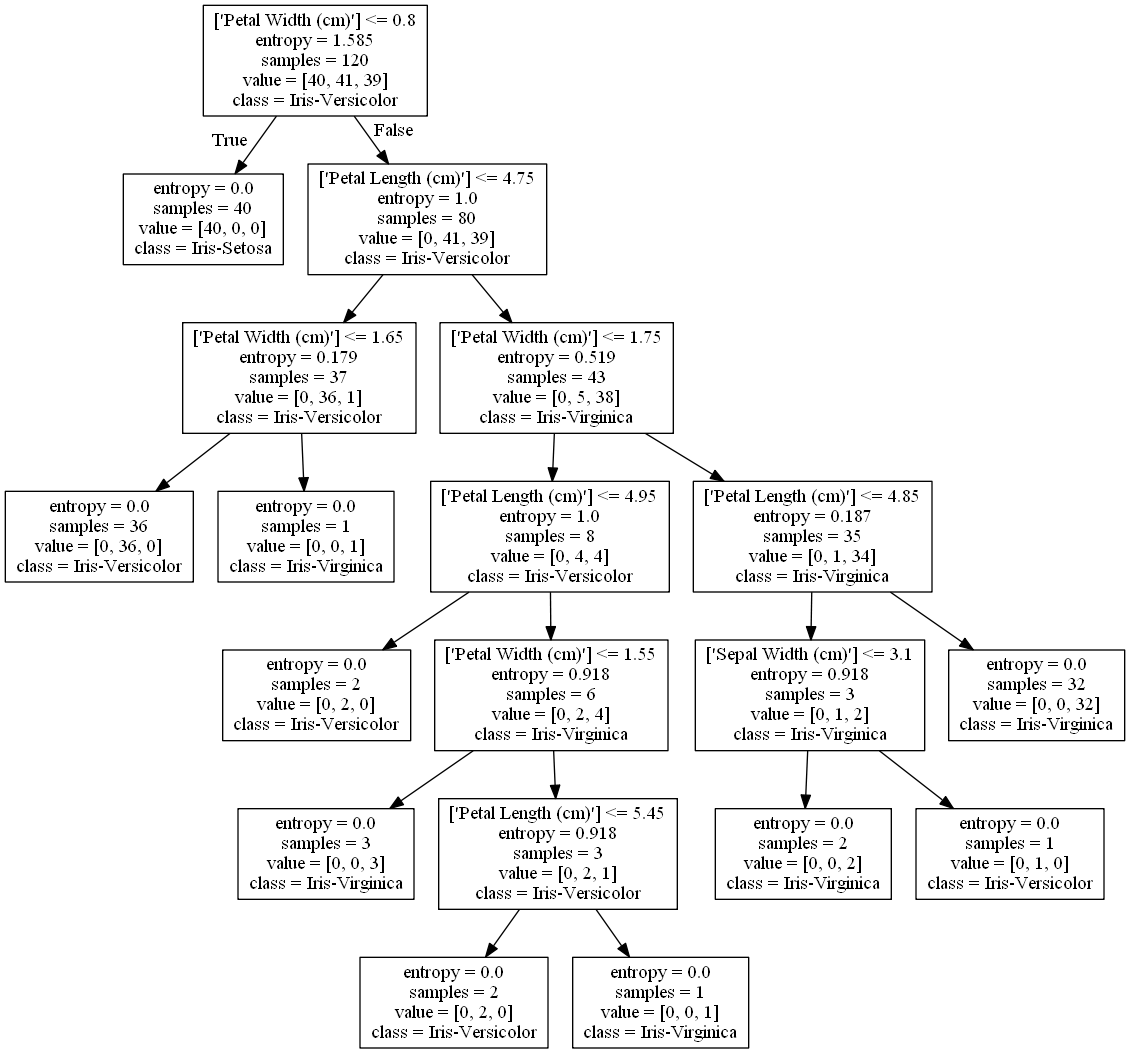

In [14]:
Image(filename='IrisDecisionTree1.png') 

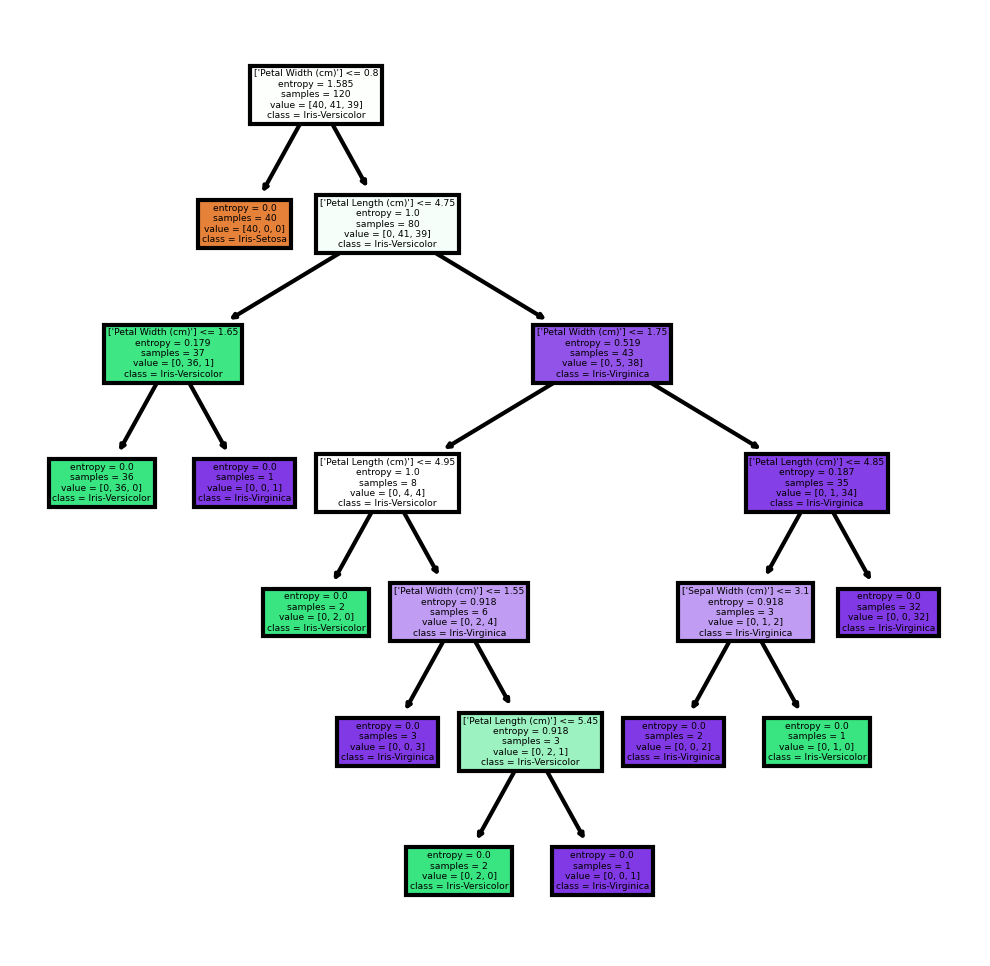

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decisiontree,
               feature_names = nama_feature, 
               class_names=nama_kelas,
               filled = True)
fig.savefig('IrisDecisionTree2.png')